<a href="https://colab.research.google.com/github/Hamsinikatla/NeuralNetwork_HW1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.	Tensor Manipulations & Reshaping



import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))
print("Original Tensor:\n", tensor.numpy())

# Step 2: Find rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print(f"\nOriginal Rank: {rank.numpy()}, Original Shape: {shape.numpy()}")

# Step 3: Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print(f"\nReshaped Shape: {reshaped_tensor.shape}")

# Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print(f"Transposed Shape: {transposed_tensor.shape}")

# Step 4: Broadcasting a smaller tensor (1, 4) and adding it
small_tensor = tf.random.uniform(shape=(1, 4))  # Shape (1,4)
broadcasted_result = transposed_tensor + small_tensor  # Broadcasting happens here
print("\nResult after Broadcasting and Addition:\n", broadcasted_result.numpy())




Explanation of Broadcasting
"""
Broadcasting in TensorFlow allows tensors with different shapes to be added or multiplied
without explicitly reshaping them. TensorFlow automatically expands the smaller tensor
along dimensions of size 1 to match the larger tensor.


Original Tensor:
 [[0.20848083 0.6510762  0.10972714 0.6999792  0.19685674 0.14748001]
 [0.41693223 0.09853411 0.53261185 0.35290396 0.66560435 0.6260567 ]
 [0.19391191 0.6910827  0.86406803 0.45941377 0.65546525 0.83299124]
 [0.699026   0.2958647  0.33913875 0.34205747 0.279261   0.9282024 ]]

Original Rank: 2, Original Shape: [4 6]

Reshaped Shape: (2, 3, 4)
Transposed Shape: (3, 2, 4)

Result after Broadcasting and Addition:
 [[[0.2308507  1.5523292  0.62582064 0.955796  ]
  [0.21628177 1.5923357  1.3801615  0.7152306 ]]

 [[0.2192266  1.048733   0.9330257  0.35435092]
  [0.6778351  1.7342442  1.2151195  0.5516815 ]]

 [[0.5549817  1.254157   1.1816978  0.8818735 ]
  [0.3615086  1.2433105  0.7953545  1.1840192 ]]]


MSE Loss (Pred 1): 0.0333
MSE Loss (Pred 2): 0.0867
CCE Loss (Pred 1): 0.2899
CCE Loss (Pred 2): 0.5249


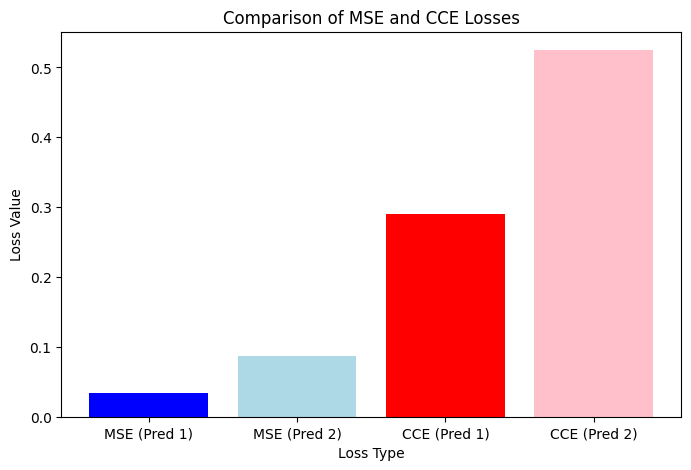

In [2]:
#2.	Loss Functions & Hyperparameter Tuning




import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([[0, 0, 1], [1, 0, 0]], dtype=tf.float32)  # One-hot encoded labels
y_pred_1 = tf.constant([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1]], dtype=tf.float32)  # Pred 1
y_pred_2 = tf.constant([[0.2, 0.3, 0.5], [0.7, 0.2, 0.1]], dtype=tf.float32)  # Modified pred 2

# Step 2: Compute Mean Squared Error (MSE) loss
mse_loss_1 = tf.keras.losses.MeanSquaredError()(y_true, y_pred_1).numpy()
mse_loss_2 = tf.keras.losses.MeanSquaredError()(y_true, y_pred_2).numpy()

# Step 3: Compute Categorical Cross-Entropy (CCE) loss
cce_loss_1 = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred_1).numpy()
cce_loss_2 = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred_2).numpy()

# Print Loss Values
print(f"MSE Loss (Pred 1): {mse_loss_1:.4f}")
print(f"MSE Loss (Pred 2): {mse_loss_2:.4f}")
print(f"CCE Loss (Pred 1): {cce_loss_1:.4f}")
print(f"CCE Loss (Pred 2): {cce_loss_2:.4f}")

# Step 4: Plot loss function values
labels = ["MSE (Pred 1)", "MSE (Pred 2)", "CCE (Pred 1)", "CCE (Pred 2)"]
loss_values = [mse_loss_1, mse_loss_2, cce_loss_1, cce_loss_2]

plt.figure(figsize=(8,5))
plt.bar(labels, loss_values, color=['blue', 'lightblue', 'red', 'pink'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and CCE Losses")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


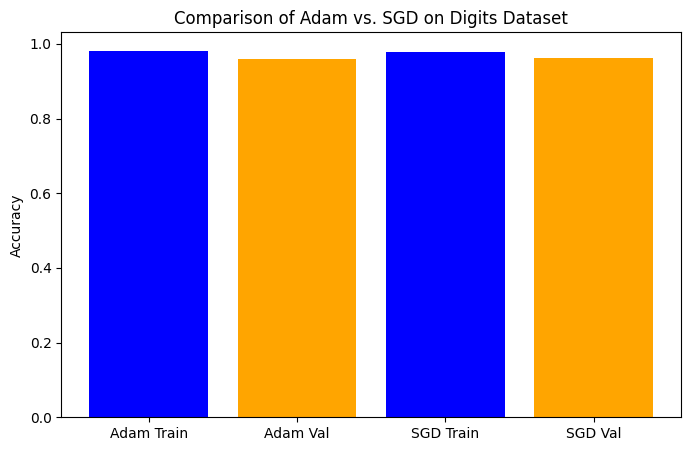

In [3]:
#3.	Train a Model with Different Optimizers




import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST-like Digits dataset (local alternative to OpenML MNIST)
digits = load_digits()
X, y = digits.data / 16.0, digits.target  # Normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Train models with Adam and SGD optimizers
adam_model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=20, random_state=42)
sgd_model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=20, random_state=42)

adam_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

# Step 3: Compute training and validation accuracy
adam_train_acc = accuracy_score(y_train, adam_model.predict(X_train))
adam_val_acc = accuracy_score(y_test, adam_model.predict(X_test))
sgd_train_acc = accuracy_score(y_train, sgd_model.predict(X_train))
sgd_val_acc = accuracy_score(y_test, sgd_model.predict(X_test))

# Step 4: Compare training and validation accuracy trends
labels = ['Adam Train', 'Adam Val', 'SGD Train', 'SGD Val']
values = [adam_train_acc, adam_val_acc, sgd_train_acc, sgd_val_acc]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Adam vs. SGD on Digits Dataset')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


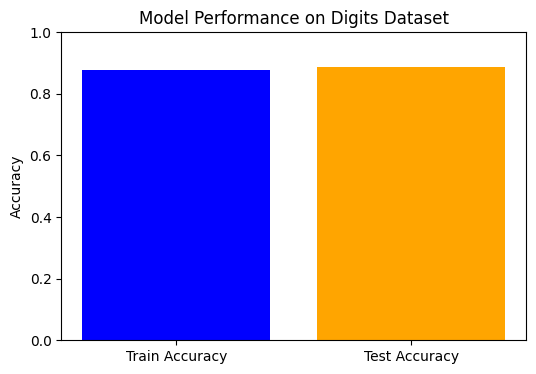

Train Accuracy: 0.8789, Test Accuracy: 0.8861


In [1]:
#4.	Train a Neural Network and Log to TensorBoard



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load MNIST-like Digits dataset
digits = load_digits()
X, y = digits.data / 16.0, digits.target  # Normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

# Plot accuracy trends
labels = ['Train Accuracy', 'Test Accuracy']
values = [train_acc, test_acc]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Performance on Digits Dataset')
plt.ylim(0, 1)
plt.show()

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")